<a href="https://colab.research.google.com/github/andressriosg/Estadistica-I-y-II/blob/main/estadisticaipython2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import files # Para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Estadística descriptiva para variables cualitativas


*   Gráficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa



In [102]:
uploaded = files.upload()

Saving nac2020.csv to nac2020 (1).csv


In [76]:
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [4]:
tabla1 = tabla[["EDAD_MADRE", "IDHEMOCLAS", "IDFACTORRH"]]
tabla1.head(4)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
44,4,9,9
44,4,9,9
44,5,9,9
44,5,9,9


In [79]:
df2 = tabla1[(tabla1.EDAD_MADRE < 99) & (tabla1["IDHEMOCLAS"] != 9) & (tabla1.IDFACTORRH != 9)]
df2.head(4)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
20,4,3,1
20,6,3,1
85,2,1,1
47,3,3,1


In [45]:
df2.EDAD_MADRE.head(2)
df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)
df2.EDAD_MADRE.head(2)

<ipython-input-45-ced7eb983115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)


COD_DPTO
20    4
20    6
Name: EDAD_MADRE, dtype: object

In [46]:
df2.loc[(df2.EDAD_MADRE == "1"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "2"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "3"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "4"), 'EDAD_MADRE'] = "10-14", "15-19", "20-24", "25-29"
df2.loc[(df2.EDAD_MADRE == "5"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "6"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "7"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "8"), 'EDAD_MADRE'] = "30-34", "35-39", "40-44", "45-49"
df2.loc[(df2.EDAD_MADRE == "9"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "99"), 'EDAD_MADRE'] = "50-55", "NA"
df2.head(5)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
20,25-29,3,1
20,35-39,3,1
85,15-19,1,1
47,20-24,3,1
19,20-24,3,1


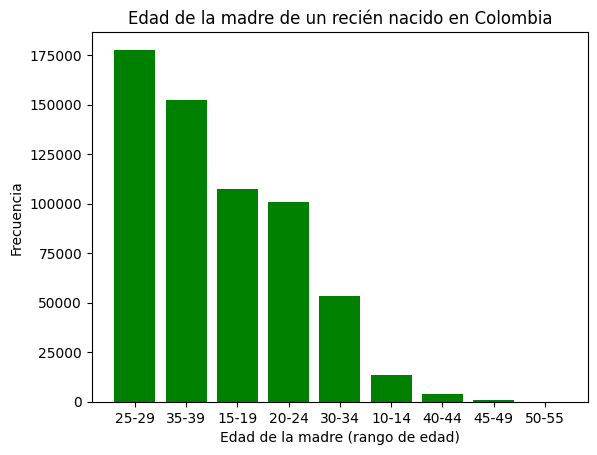

In [47]:
x_values = df2.EDAD_MADRE.unique()
y_values = df2.EDAD_MADRE.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title('Edad de la madre de un recién nacido en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Edad de la madre (rango de edad)')
ax.set_ylabel('Frecuencia')
plt.show()

El valor de 25 a 29 años es el rango de edad donde se tienen alrededor de 175000 madres de recién nacidos en Colombia, y es donde se tienen más madres. En rango de edad de 30 a 34 años se tienen aproximadamente 50000 madres de recién nacidos en Colombia. Los rangos de edades de 10 a 14 años, de 40 a 44 años, de 45 a 49 años y de 50 a 54 años tienen menos de 25000 madres de recién nacidos en Colombia.

In [48]:
sizes = np.array(y_values)
sizes

array([177762, 152262, 107407, 100703,  53505,  13647,   4120,    902,
          106])

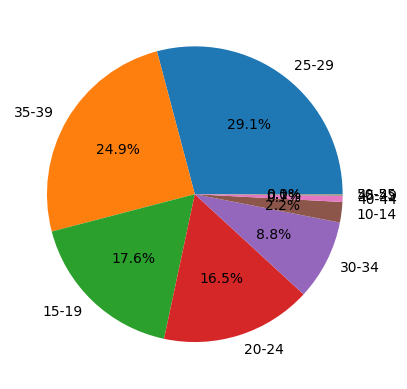

In [49]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [32]:
len(df2.EDAD_MADRE)

610414

In [50]:
porcentaje = [(x/len(df2.EDAD_MADRE)*100) for x in y_values]
print(x_values)
print(porcentaje)

['25-29' '35-39' '15-19' '20-24' '30-34' '10-14' '40-44' '45-49' '50-55']
[29.121547015632014, 24.944054363104385, 17.595762875687647, 16.49749186617607, 8.76536252445062, 2.235695773688022, 0.6749517540554443, 0.14776856363058513, 0.01736526357521289]


Aproximadamente el 29.12% de las madres de recién nacidos en Colombia tiene entre 25 y 29 años, el 24.94% entre 35 y 39 años, el 17.6% entre 15 y 19 años, el 16.5% entre 20 y 24 años, el 8.77% entre 30 y 34 años, el 2.24% entre 10 y 14 años, el 0.67% entre 40 y 44 años, el 0.15% entre 45 y 49 años, y el 0.02% entre 50 y 55 años

# Tablas de contingencia


*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



In [81]:
df2.loc[(df2.IDHEMOCLAS == 1), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 2), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 3), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 4), "IDHEMOCLAS"] = "A", "B", "O", "AB"
df2.loc[(df2.IDFACTORRH == 1), "IDFACTORRH"], df2.loc[(df2.IDFACTORRH == 2), "IDFACTORRH"] = "Positivo", "Negativo"
df2.IDHEMOCLAS, df2.IDFACTORRH = df2.IDHEMOCLAS.astype(str), df2.IDFACTORRH.astype(str)
df2.head(3)

<ipython-input-81-8f2291b12947>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.IDHEMOCLAS, df2.IDFACTORRH = df2.IDHEMOCLAS.astype(str), df2.IDFACTORRH.astype(str)


,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
20,4,O,Positivo
20,6,O,Positivo
85,2,A,Positivo


In [82]:
tabla_cont = pd.crosstab(df2.IDHEMOCLAS, df2["IDFACTORRH"])
tabla_cont

IDFACTORRH,Negativo,Positivo
IDHEMOCLAS,,
A,7571,145747
AB,590,10477
B,2465,53545
O,17168,372851


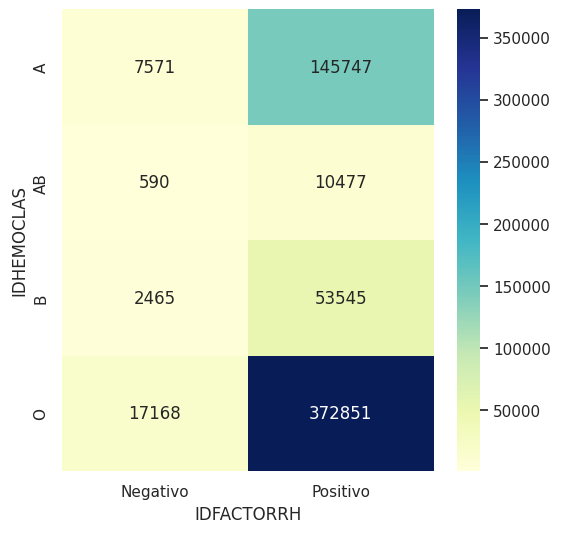

In [83]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

In [98]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 91.22282137965206 y el valor p es d 1.196444966259606e-19




*   Si valor p < 0.05 se rechaza la hipótesis nula
*   Si valor p > 0.05 no se rechaza la hipótesis nula

Como el valor p $=1.196444966259606\times10^{-19} < 0.05$ se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95% que la hemoclasificación y el factor RH estén asociadas para los individuos recién nacidos en Colombia.


In [101]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.IDFACTORRH)))
coeficiente_phi = math.sqrt(chi/len(df2.IDFACTORRH))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.IDFACTORRH)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.012223823155647762, 0.012224736511156013 y 0.012224736511156013


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174, el cual se puede consultar en el siguiente [link](https://www.jstor.org/stable/2529310), se tiene que la hemoclasificación y el factor RH están insignificantemente asociados

Interpretación general

*   Y depende ____ de X
*   X y Y son ______ homogénas
*   X y Y están ______ asociadas

Donde ______ = nula ($Chi, \phi, V ≈ 0$), ______ = insignificantemente ($0 < Chi, \phi, V < 0.2$), ______ = discretamente ($0.2 < Chi, \phi, V < 0.4$), ______ = moderadamente, ($0.4 < Chi, \phi, V < 0.6$) ______ = sustancialmente ($0.6 < Chi, \phi, V < 0.8$) y ______ = fuertemente ($0.8 < Chi, \phi, V < 1$)
